# Lego Sets Data From 1949 - 2020

By Dominic Graziano

Explanation of data - 

Name = original set name \
Theme = designated theme of the set \
Minifigs = number of minifigures contained in the set \
Subtheme = subtheme within the theme \
Desc = written description of the set \
Prices = MSRP price of the set, contains dollars, pounds or euros \
Pieces = number of pieces contained in the set \
Year = year the set was listed as being introduced

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

Some of the things I wanted to showcase with this data are:
* the price discrepancies between the themes (licensed themes such as Star Wars, Marvel, DC, compared to lego original themes)
* see the price per piece breakdown throughout the history of lego
* breakdown the number of sets and themes produced per year


In [181]:
df = pd.read_csv('lego.csv')
df.head()

,Unnamed: 0,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year
0,0,700-12,System,NaN,Basic Set,700-12: Automatic Binding Bricks,NaN,NaN,1949
1,1,700_1_1-1,System,NaN,Supplemental,700_1_1-1: Individual 2 x 4 Bricks,NaN,NaN,1950
2,2,700_1_2-1,System,NaN,Supplemental,700_1_2-1: Individual 2 x 2 Bricks,NaN,NaN,1950
3,3,700_A-1,System,NaN,Basic Set,700_A-1: Automatic Binding Bricks Small Brick ...,NaN,NaN,1950
4,4,700_B_1-1,System,NaN,Supplemental,700_B_1-1: Individual 1 x 4 x 2 Window (withou...,NaN,NaN,1950


In [182]:
df = df.drop(columns = ["Unnamed: 0"])


In [183]:
df['Theme'].unique()

array(['System', 'Promotional', 'Dacta', 'Samsonite', 'Trains', 'Books',
       'Universal Building Set', 'Legoland', 'Duplo', 'Minitalia',
       'LEGOLAND', 'Homemaker', 'Gear', 'Basic',
       'Building Set with People', 'PreSchool', 'Hobby Set', 'Technic',
       'Service Packs', 'Town', 'Castle', 'Space', 'Fabuland', 'Scala',
       'Boats', 'Model Team', 'Assorted', 'Pirates', 'Belville',
       'Creator', 'Freestyle', 'Primo', 'Aquazone', 'Time Cruisers',
       'Western', 'Classic', 'Adventurers', 'Znap', 'Racers',
       'Mindstorms', 'Education', 'Seasonal', 'Rock Raiders', 'Star Wars',
       'Studios', 'Baby', 'Action Wheelers', 'Sports', 'Bulk Bricks',
       'Creator Expert', 'Mickey Mouse', 'Bionicle', 'Jack Stone',
       'Harry Potter', 'Dinosaurs', 'Alpha Team', 'Explore', 'Spybotics',
       'Galidor', 'Miscellaneous', 'Island Xtreme Stunts', 'Clikits',
       'World City', '4 Juniors', 'Spider-Man', 'Discovery', 'Quatro',
       'Make and Create', 'City', 'Factory',

I wanted to filter out and only get the sets that are based on the dollar

In [184]:
df = df[df['Prices'].str.contains('€') == False]

Get rid of the  $ and | which won't allow us to convert the string to a float 

In [185]:
df['Prices'] = df['Prices'].str.replace('\$','')
df['Prices'] = df['Prices'].str.replace('\|','')
 
df['Prices'] = df['Prices'].astype(float)


/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_51020/1905844088.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Prices'] = df['Prices'].str.replace('\$','')
/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_51020/1905844088.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Prices'] = df['Prices'].str.replace('\|','')


In [186]:
df['Price_Per_Piece'] = df['Prices'] / df['Pieces']
df.head()

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
179,215-3,Samsonite,NaN,Supplemental,215-3: 2 X 8 Bricks,0.5,9.0,1961,0.055556
181,217-3,Samsonite,NaN,Supplemental,217-3: 4 x 4 Corner Bricks,0.5,10.0,1961,0.050000
182,218-3,Samsonite,NaN,Supplemental,218-3: 2 x 4 Bricks,0.5,20.0,1961,0.025000
183,219-2,Samsonite,NaN,Supplemental,219-2: 2 X 3 Bricks,0.5,24.0,1961,0.020833
184,220-2,Samsonite,NaN,Supplemental,220-2: 2 X 2 Bricks,0.5,33.0,1961,0.015152


in future use this code to write a loop through all years and plot

In [187]:
df[df['Year']== 2008]['Theme'].nunique()

23

In [188]:
sort_p = df.sort_values(by = 'Prices' ,ascending= False)
sort_p = sort_p[:50]
sort_p['Theme'].value_counts()

Star Wars           9
Education           8
Technic             7
Creator Expert      6
Mindstorms          6
Gear                5
Dacta               2
Trains              2
Architecture        1
Studios             1
Monster Fighters    1
City                1
Space               1
Name: Theme, dtype: int64

In [189]:
df.sort_values(by = 'Price_Per_Piece', ascending= False)

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
3754,8299-1,Technic,1.0,NaN,8299-1: Search Sub,50.00,0.0,1997,inf
8552,10287-1,Mindstorms,NaN,NXT,10287-1: Intelligent NXT Brick (Black),169.99,1.0,2009,169.99
4480,9709-1,Mindstorms,NaN,1.0,9709-1: RCX Programmable LEGO Brick,110.00,1.0,1999,110.00
4869,9917-1,Education,NaN,Mindstorms,9917-1: DCP Sensor Connector Cable,59.00,1.0,2000,59.00
9601,10286-1,Mindstorms,NaN,NXT,10286-1: Colour Sensor,54.99,1.0,2011,54.99
...,...,...,...,...,...,...,...,...,...
16683,5005893-1,Gear,NaN,Housewares,5005893-1: White Black and Gray Wall Hanger Set,9.99,NaN,2020,NaN
16684,5005894-1,Gear,NaN,Housewares,5005894-1: Pink Light Blue and White Wall Hang...,9.99,NaN,2020,NaN
16685,5005963-1,Gear,NaN,Stationery,5005963-1: 12 Pack Marker Set,19.99,NaN,2020,NaN
16690,5006035-1,Gear,NaN,Miscellaneous,5006035-1: Holiday Bag Tag Stormtrooper,5.99,NaN,2020,NaN


In [190]:
year_df = df.groupby('Year')


In [191]:
year_theme_df = df.groupby('Year')['Theme'].nunique()

<AxesSubplot:xlabel='Year'>

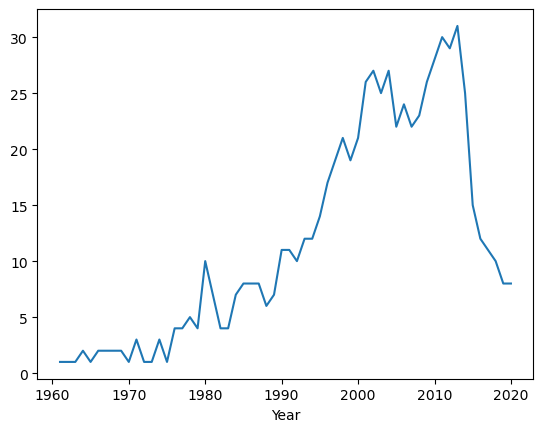

In [192]:
year_theme_df.plot()

In [215]:
sw_df = df[df['Theme'] == 'Star Wars']
sw_df.tail(50)

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
10243,30057-1,Star Wars,NaN,Episode I,30057-1: Anakin's Podracer,4.99,38.0,2012,0.131316
10245,30059-1,Star Wars,NaN,The Clone Wars,30059-1: MTT,3.97,51.0,2012,0.077843
10439,5000062-1,Star Wars,1.0,Minifig Pack,5000062-1: Darth Maul,0.00,7.0,2012,0.000000
10440,5000063-1,Star Wars,1.0,Episode I,5000063-1: TC-14,0.00,3.0,2012,0.000000
10533,COMCON019-1,Star Wars,1.0,Episode I,COMCON019-1: Sith Infiltrator (SDCC 2012 exclu...,40.00,84.0,2012,0.476190
10692,30240-1,Star Wars,NaN,The Clone Wars,30240-1: Z-95 Headhunter,4.99,54.0,2013,0.092407
10693,30241-1,Star Wars,NaN,The Clone Wars,30241-1: Mandalorian Fighter,4.99,49.0,2013,0.101837
10694,30242-1,Star Wars,NaN,The Clone Wars,30242-1: Republic Frigate,4.99,45.0,2013,0.110889
10998,75000-1,Star Wars,4.0,Episode II,75000-1: Clone Troopers vs. Droidekas,12.99,124.0,2013,0.104758
10999,75001-1,Star Wars,4.0,The Old Republic,75001-1: Republic Troopers vs. Sith Troopers,12.99,63.0,2013,0.206190


In [212]:
table = pd.pivot_table(sw_df, index = ['Subtheme'], aggfunc = {'Minifigs':'sum', 'Prices':'median', 'Price_Per_Piece':'mean', 'Name':'count'},fill_value= 0)
table

,Minifigs,Name,Price_Per_Piece,Prices
Subtheme,,,,
Episode I,120,30,0.121095,24.995
Episode II,55,15,0.110221,30.000
Episode III,90,28,0.114860,27.490
Episode IV,97,26,0.118960,39.990
Episode V,96,21,0.118114,49.990
Episode VI,112,28,0.130810,22.490
Gear,0,1,0.000000,69.990
Legends,22,8,0.122999,34.990
Microfighters,2,2,0.104074,9.990


In [213]:
table = pd.pivot_table(sw_df, index = ['Year'], aggfunc = {'Minifigs':'sum', 'Prices':'median', 'Price_Per_Piece':'mean', 'Name':'count'},fill_value= 0)
table

,Minifigs,Name,Price_Per_Piece,Prices
Year,,,,
1999,42,13,0.113038,20.00
2000,43,19,0.127841,20.00
2001,18,10,0.107324,35.00
2002,42,23,0.125267,30.00
2003,34,19,0.099559,7.00
2004,24,12,0.108748,25.00
2005,62,19,0.105226,30.00
2006,42,11,0.089700,49.99
2007,72,18,0.200709,49.99


In [195]:
sw_gb_df = sw_df.groupby('Year')['Price_Per_Piece'].mean()
sw_gb_df


Year
1999    0.113038
2000    0.127841
2001    0.107324
2002    0.125267
2003    0.099559
2004    0.108748
2005    0.105226
2006    0.089700
2007    0.200709
2008    0.112201
2009    2.639026
2010    0.153459
2011    0.127109
2012    0.136791
2013    0.128559
2014    0.104285
2015    0.713659
2017    0.167939
2019    0.122294
Name: Price_Per_Piece, dtype: float64

<AxesSubplot:xlabel='Year'>

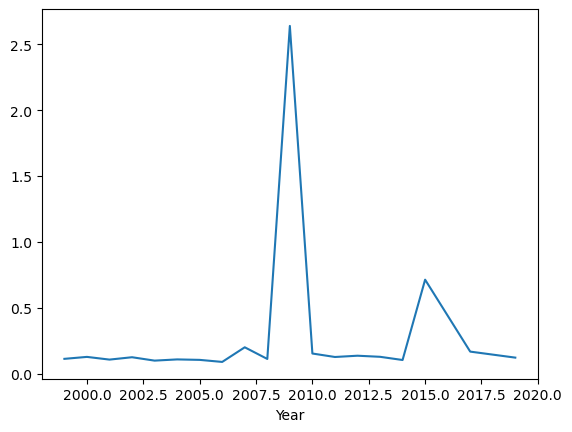

In [196]:
sw_gb_df.plot()

<AxesSubplot:xlabel='Year', ylabel='Price_Per_Piece'>

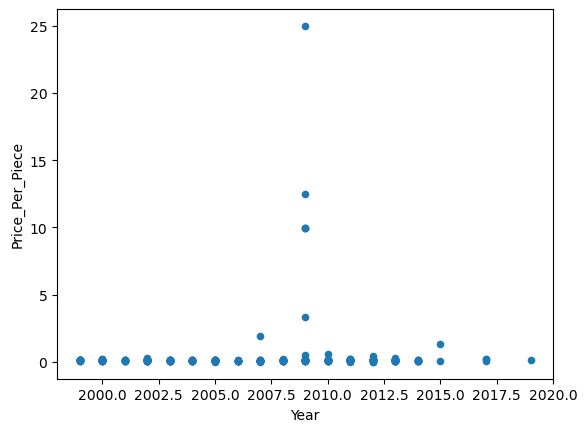

In [197]:
sw_df.plot.scatter(x = 'Year', y = 'Price_Per_Piece')